In [ ]:
# Этим блоком будем визуализировать
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy

# Библиотеки Pytorch
import torch 
import torchvision # здесь лежат mnist, cifar и много других датасетов и трансформаций для картинок
import torch.nn as nn # здесь лежат все слои
import torch.utils.data as data # работа с загрузчиком данных
import torchvision.transforms as transforms # библиотека для преобразования изображений
import torchvision.datasets as dsets # работа с классом Датасет

# Вывод информации о модели
from torchsummary import summary

# Визуализации графа
from torch.utils.tensorboard import SummaryWriter 
import datetime, os
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Базовые понятия



Тензоры

torch.tensor или torch.FloatTensor - тензор с типом данных float32

torch.HalfTensor - тензор с типом данных float16

torch.DoubleTensor - тензор с типом данных float64

torch.ShortTensor - тензор с типом данных int16

torch.IntTensor - тензор с типом данных int32

torch.LongTensor - тензор с типом данных int64

torch.CharTensor - тензор с типом данных int8

torch.ByteTensor - тензор с типом данных uint8

torch.BoolTensor - тензор с типом данных bool

In [ ]:
# Создание Тензора
x = torch.tensor(5.) # Создаем скаляр
y = torch.FloatTensor([5.1]) # Список типа float
z = torch.FloatTensor(6, 3) # Список типа float из шести значений
print(x)
print(y)
print(z)

tensor(5.)
tensor([5.1000])
tensor([[-2.7654e+20,  3.0756e-41,  7.0065e-44],
        [ 7.0065e-44,  6.3058e-44,  6.7262e-44],
        [ 7.1466e-44,  6.3058e-44,  7.0065e-44],
        [ 7.7071e-44,  1.1771e-43,  6.7262e-44],
        [ 7.7071e-44,  8.1275e-44,  7.1466e-44],
        [ 7.5670e-44,  8.1275e-44,  7.1466e-44]])


In [ ]:
# Индексирование
print(z[0])
print(z[::2])

tensor([-2.7654e+20,  3.0756e-41,  7.0065e-44])
tensor([[-2.7654e+20,  3.0756e-41,  7.0065e-44],
        [ 7.1466e-44,  6.3058e-44,  7.0065e-44],
        [ 7.7071e-44,  8.1275e-44,  7.1466e-44]])


In [ ]:
# Информация о тензоре
print(z.dim()) # Размерность тезора
print(z.size()) # Размер или форма тензора (аналог .shape)
print(z.type()) # Тип элементов
print(z.data_ptr()) # Место в памяти, где хранится тензор

2
torch.Size([6, 3])
torch.FloatTensor
94269724417024


**Операции над тензорами**




In [ ]:
# Виды функций
# Immutable function (exp(), abs())

y = torch.IntTensor([-1, 2,-3]) # Создаем тензор
x = y.abs() # Вызываем метод получения модуля (Immutable)
print(y) # Выводим y
print(x) # Выводим x

tensor([-1,  2, -3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)


In [ ]:
# Mutable function
y = torch.IntTensor([-1, 2, -3]) # Создаем тензор 
x = y.abs_()  # Вызываем метод получения модуля (Mutable)
print(y) # Выводим y
print(x) # Выводим x

tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)


In [ ]:
print(x.data_ptr(), y.data_ptr())

94269728203136 94269728203136


In [ ]:
x = torch.FloatTensor(2, 3) # Создаем тензор размерностью 2 на 3
x.zero_() # Заполняем его нулями
print(x) # Выводим x

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
y = torch.FloatTensor(2, 3).zero_() # Создаем тензор размерностью 2 на 3 и заполняем нулями
print(y) # Выводим y

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
x = torch.tensor(3.) # Создаем тензор
y = torch.tensor(7.) # Создаем тензор
z1 = x.add(y) # Складываем x и y И записываем результат в z1
z2 = torch.add(x, y) # Складываем x и y И записываем результат в z2
x.add_(y) # Складываем x и y И записываем результат в x
print(z1, z2, x) # Выводим z1, z2, x

tensor(10.) tensor(10.) tensor(10.)


In [ ]:
x = torch.tensor(3.) # Создаем тензор
y = torch.tensor(7.) # Создаем тензор
x += y
print(x)

tensor(10.)


**NumPy**



In [ ]:
a = np.random.rand(2, 2) # Сорздаем numpy массив размерностью 2 на 2 из случайных чисел
a # Выводим a

array([[0.69205377, 0.44131559],
       [0.34894059, 0.55332916]])

In [ ]:
# NumPy -> Torch
b = torch.from_numpy(a) # Переводим Numpy в Torch
b # Выводим b

tensor([[0.6921, 0.4413],
        [0.3489, 0.5533]], dtype=torch.float64)

In [ ]:
# Torch -> Numpy
c = b.numpy() # Переводим Torch в Numpy
c # Выводим c

array([[0.69205377, 0.44131559],
       [0.34894059, 0.55332916]])

**CUDA**




In [ ]:
x.is_cuda # Проверяем где размещен тензор

False

In [ ]:
!nvidia-smi # Утилита для вывода информации о GPU

Sun Mar 27 07:36:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
if not x.is_cuda: # Если не на GPU
  x = x.cuda() # Размещаем на GPU (создаем копию)
print(x.is_cuda) # Проверям: размещен ли тензор на GPU

True


In [ ]:
!nvidia-smi

Sun Mar 27 07:37:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    56W / 149W |    517MiB / 11441MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.is_available() # Проверяем доступна ли в текущем сеансе GPU

True

In [ ]:
# Создадим переменную, в которой будет храниться тип устройства (GPU или CPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
x.to(device) # Отправляем тензор на устройство
x.is_cuda

True

**AD (automatic differentiation)**




In [ ]:
# Создаем тензоры
x = torch.tensor(5.)
w = torch.tensor(2., requires_grad=True) # requires_grad=True означает, что для тензора будет сохранена история операций над ним
b = torch.tensor(3., requires_grad=True)

In [ ]:
# Строим вычислительный граф
y = w.mul(x).add(b)    # y = w * 5 + b
y

tensor(13., grad_fn=<AddBackward0>)

In [ ]:
y.grad_fn

In [ ]:
# Вычисляем градиенты (выполняем обратный проход и получаем производную всех переменных)
y.backward()

In [ ]:
# Посмотрим градиенты для каждого из задействованных тензоров
print(x.grad)    
print(w.grad)    
print(b.grad)    

None
tensor(5.)
tensor(1.)


# Пишем первый нейрон



In [ ]:
# Создаем тензоры
x = torch.randn(1) # входные данные для будущей модели (матрица случайных значений, соответствующих нормальному распределению)
y = torch.randn(1) # тензор с правильными ответами (матрица случайных значений, соответствующих нормальному распределению)
print(x)
print(y)

tensor([0.2665])
tensor([0.6617])


In [ ]:
# Создаем 1 линейный слой (по сути, является нашей нейронной сетью из одного слоя)
# y = w * x + b
linear = nn.Linear(in_features = 1, out_features = 1, bias = False) # Linear это аналог Dense в Keras
print('веса: ', linear.weight)

веса:  Parameter containing:
tensor([[0.9891]], requires_grad=True)


In [ ]:
list(linear.parameters())

[Parameter containing:
 tensor([[0.9891]], requires_grad=True)]

In [ ]:
# Применяем слой для x (прогоняем через нашу сетку)
pred = linear(x)
print(pred)

tensor([0.2636], grad_fn=<SqueezeBackward3>)


In [ ]:
# Функция ошибки (средне-квадратичное отклонение)
criterion = nn.MSELoss()
# mse = (y_true - y_pred)**2 / n
 
# Оптимизатор, первый аргумент которого это параметры нейронной сети (в нашем случае линейный слой)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) 
print(optimizer.param_groups) # выведем информацию об оптимизаторе

[{'params': [Parameter containing:
tensor([[0.9891]], requires_grad=True)], 'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}]


In [ ]:
loss = criterion(pred, y) # Считаем ошибку
print(loss)
print('ошибка: ', loss.item()) # метод item() используется для получения числа из тензора, содержащего одно значение

tensor(0.1585, grad_fn=<MseLossBackward0>)
ошибка:  0.15845069289207458


In [ ]:
# Обратное распространение 
loss.backward()

# Посмотрим на наши градиенты
print ('dL/dw: ', linear.weight.grad)

dL/dw:  tensor([[-0.2122]])


In [ ]:
-2 * x * (y - linear.weight * x)

tensor([[-0.2122]], grad_fn=<MulBackward0>)

In [ ]:
# Делаем шаг градиентного спуска w = w - lr*grad
optimizer.step()
print(optimizer.param_groups)

# Оптимизацию можно осуществлять также и на более низком уровне:
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Ошибка после оптимизации
pred = linear(x) 
loss = criterion(pred, y)
print('ошибка после шага оптимизации: ', loss.item())

[{'params': [Parameter containing:
tensor([[0.9912]], requires_grad=True)], 'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}]
ошибка после шага оптимизации:  0.15800073742866516


In [ ]:
print(linear.weight.grad)     # вывод текущего градиента
for i in range(10):
    pred = linear(x)          # предсказание модели
    loss = criterion(pred, y) # вычисляем ошибку
    loss.backward()           # обратное распространение ошибки
    print(linear.weight.grad) # вывод обновленного градиента
    optimizer.step()          # шаг оптимизации

tensor([[-0.2122]])
tensor([[-0.4241]])
tensor([[-0.6354]])
tensor([[-0.8458]])
tensor([[-1.0550]])
tensor([[-1.2627]])
tensor([[-1.4686]])
tensor([[-1.6724]])
tensor([[-1.8738]])
tensor([[-2.0726]])
tensor([[-2.2684]])


In [ ]:
optimizer.zero_grad() # обнуляем градиент

In [ ]:
linear.weight.grad # вывод текущего градиента

tensor([[0.]])

In [ ]:
# Обычно прогонка сети составляет больше одной эпохи.
# Прогоним ее 100 эпох
for i in range(100): 
    # Обнуляем вручную градиент на каждой итерации
    optimizer.zero_grad()

    # Прогоняем переменную через сеть
    pred = linear(x) 

    # Считаем функцию ошибки
    loss = criterion(pred,y)

    # Обратное распространение ошибки
    loss.backward()

    # Делаем шаг градиентного спуска
    optimizer.step()
    if i%10 ==0:
        print(loss.detach()) # .detach() отделяет тензор от вычислительного графа. Используется всегда при выводе значений

tensor(0.1305)
tensor(0.1269)
tensor(0.1233)
tensor(0.1199)
tensor(0.1165)
tensor(0.1132)
tensor(0.1101)
tensor(0.1070)
tensor(0.1040)
tensor(0.1011)


In [ ]:
linear.weight # Веса

Parameter containing:
tensor([[1.3066]], requires_grad=True)

In [ ]:
pred = linear(x) # финальное предсказание
print('Предсказание: ', pred.item())
print('Правильный ответ: ', y.item())

Предсказание:  0.3482736349105835
Правильный ответ:  0.6616868376731873


# Подготовка данных



In [ ]:
# Скачиваем готовые данные и создаем датасет
trainDataset = dsets.CIFAR10(root='./data/',                   # путь, где лежат данные
                             train=True,                       # создание данных из тренировочной выборки
                             transform=transforms.ToTensor(),  # здесь функция, превращающая PIL картинку в тензор
                             download=True)                    # True - данные скачиваются и помещаются в указанный путь

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data/


In [ ]:
# Возьмем пару картинка-метка из всего набора
image, label = trainDataset[9]
print(image.size())
print(image[1].size())
print(type(image)) 
print(label)

torch.Size([3, 32, 32])
torch.Size([32, 32])
<class 'torch.Tensor'>
3


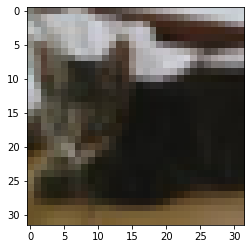

In [ ]:
# Вывод картинки (способ 1). Обратная трансформация
to_pil_image = transforms.ToPILImage() # Создаем трансформацию в PIL
img = to_pil_image(image.cpu()) # Преобразуем обратно в PIL
plt.imshow(img)
plt.show()

(3, 32, 32)
(32, 32, 3)


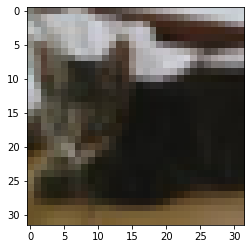

In [ ]:
# Вывод картинки (способ 2). Через numpy
img = image.cpu().numpy() # Превращаем тензор в numpy-массив
print(img.shape)
img = np.transpose(img, (1,2,0)) # Меняем местами оси
print(img.shape)
plt.imshow(img)
plt.show() 

In [ ]:
# Data Loader (наиболее эффективный способ загружать данные)
trainLoader = torch.utils.data.DataLoader(dataset=trainDataset,
                                          batch_size=100, 
                                          shuffle=True, # перемешивание данных 
                                          num_workers = 4) # сколько подпроцессов использовать для загрузки данных. 0 - по умолчанию - в основном процессе

# Когда начнется итерация, по очереди начнут выгружаться файлы из сета
dataIter = iter(trainLoader) 

# Мини batch картинок и меток
images, labels = dataIter.next()

# Обычно train_loader используется так:
for images, labels in trainLoader:
    # здесь ваш код
    pass

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
images.shape

torch.Size([100, 3, 32, 32])

In [ ]:
labels.shape

torch.Size([100])

# Создание собственного набора данных

# Подготовка собственных данных



In [ ]:
# Используем готовый data loader от torch
path = '/content/drive/My Drive/УИИ/Lessons/PyTorch/example/' 
listID = os.listdir(path)
labels = [0,1,2]
print(listID)

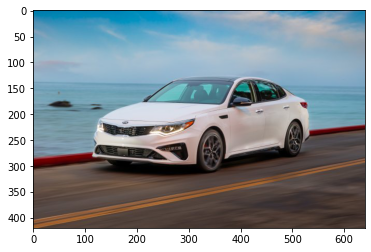

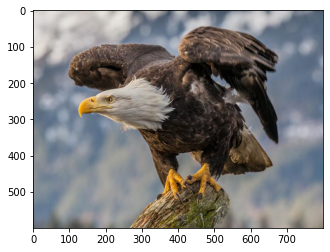

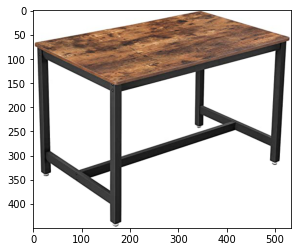

In [ ]:
for i in listID:
  plt.imshow(Image.open(path + i))
  plt.show()

In [ ]:
# Создаем класс для собственных данных, наследуя свойства стандартного датасета
class CustomDataset(data.Dataset):
    def __init__(self, listID, labels, path, transforms = None): 
        # Инициализируем атрибуты (они абсолютно произвольные. У вас они могут быть совсем другими)
        self.listID = listID # listID список имен каждого экземпляра
        self.labels = labels # labels - то, что скормим как yTrain
        self.transforms = transforms # если нужны какие-то преобразования
        self.path = path # путь, где лежат данные
        

    def __getitem__(self, index):        
        # В этом методе указывается то, как будут извлекаться данные при очередном обращении в цикле обучения
        # Открываем папку с данными (можно использовать numpy.fromfile, PIL.Image.open)
        ID = self.listID[index] # итерируем по каждому элементу в списке
        image = Image.open(path + ID) # извлекаем картинку по его ID

        # Если transforms заполнено, то:
        if self.transforms:
            image = self.transforms(image) # то, что лежит в transforms применяем к картинку
        trainX = image # наша картинка уходит в xTrain для этой итерации
        trainY = self.labels[index] # лейбл для этой картинки уходит в yTrain
        
        # Возвращаем пару экзмепляр-метка
        return trainX, trainY

    def __len__(self):
        # Здесь общий размер вашего датасета
        return len(listID)

In [ ]:
# Пример последовательности трансфорирмирования для изображений
transform = transforms.Compose([
        transforms.RandomResizedCrop((30,30)), # произвольное обрезание картинки
        transforms.ToTensor()]) # преобразование в тензор (иначе никак)


In [ ]:
customData = CustomDataset(listID,labels,path,transform)

trainLoader = torch.utils.data.DataLoader(dataset=customData,
                                           batch_size=2, 
                                           shuffle=True,
                                           num_workers=4)

In [ ]:
dataiter = iter(trainLoader)
images = dataiter.next()
images[0].shape

torch.Size([2, 3, 30, 30])

In [ ]:
images = dataiter.next()
images[0].shape

torch.Size([1, 3, 30, 30])

# Сохранение и загрузка модели



In [ ]:
# Сохранение и загрузка всей модели
torch.save(linear, 'model.pkl')
model = torch.load('model.pkl') # сохраняются даже состояния оптимизатора, результата эпох и т.д.

# Рекомендуется сохранение только параметров модели (в целях безопасности)
torch.save(linear.state_dict(), 'params.pkl')
linear.load_state_dict(torch.load('params.pkl'))

# **Классифицируем MNIST**



Задаем параметры

In [ ]:
inputSize = 784      # Размер входных данных
numClasses = 10      # Количество классов
numEpochs = 10       # Количество эпох
learningRate = 0.001 # Скорость обучения
hidden = 500         # Размер скрытого слоя

Загружаем данные 

In [ ]:
# Загрузим MNIST
batchSize = 100

# Обучающая выборка
trainDataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

# Тестовая выборка
testDataset = dsets.MNIST(root='./data', 
                          train=False, 
                          transform=transforms.ToTensor())

# Dataset Loader (подготовка данных для сети)
trainLoader = torch.utils.data.DataLoader(dataset=trainDataset, # Какой датасет
                                          batch_size=batchSize, # На сколько batch разделен
                                          shuffle=True) 

testLoader = torch.utils.data.DataLoader(dataset=testDataset, #  Какой датасет
                                         batch_size=batchSize, # На сколько batch разделен
                                         shuffle=False)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Посмотрим на нашу выборку
dataIter = iter(trainLoader) # По какой выборке пройдемся
trainX, trainY = dataIter.next() # Присваиваем текущий batch

In [ ]:
trainX.shape

torch.Size([100, 1, 28, 28])

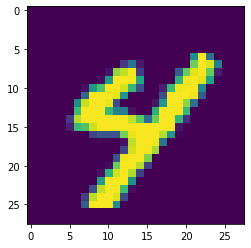

In [ ]:
plt.imshow(trainX[1, 0])

# Архитектура модели



In [ ]:
# Создаем класс
class Classification(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__() # наследуем все свойства + добавляем свое
        self.layer1 = nn.Linear(inputSize, hidden_size) # первый слой - линейный
        self.relu = nn.ReLU() 
        self.layer2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1) # Поскольку задача классификации, то используется функция активации softmax

    def forward(self, x): # Здесь мы прописываем принципы, по которым данные будут проходить через сеть
        out = self.layer1(x)  # выход первого слоя
        out = self.relu(out) # применяем функцию активации к выходу первого слоя
        out = self.layer2(out) # передаем это во второй слой
        out = self.softmax(out) # применяем функцию активации ко второму слою
        return out

model = Classification(inputSize, hidden, numClasses).to(device) # Создаем объект нашей полносвязной сети

In [ ]:
summary(model, (inputSize,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 500]         392,500
              ReLU-2                  [-1, 500]               0
            Linear-3                   [-1, 10]           5,010
           Softmax-4                   [-1, 10]               0
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.52
Estimated Total Size (MB): 1.53
----------------------------------------------------------------


In [ ]:
class Static_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(784, 200)
    self.layer2 = nn.Linear(200, 10)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(dim=1)
    self.tanh = nn.Tanh()

  def forward(self, x):

    x = self.layer1(x)
    x = self.relu(x)
    x = self.softmax(self.layer2(x))
    return x

In [ ]:
trainX.view(-1, 28*28).shape # view операция идентичная reshape, за исключением, что она меняет размер массива только для данной итерации

torch.Size([100, 784])

In [ ]:
trainX.size()

torch.Size([100, 1, 28, 28])

# Функция ошибки и оптимизатор



In [ ]:
criterion = nn.CrossEntropyLoss() # функция ошибки
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) # оптимизатор
losses = [] # сюда будет добавляться средняя ошибка. Список будем использовать для построения графика
model.train() # переход в режим обучения

Classification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

# Обучаем модель



Эпоха: [1/10], Ошибка: 0.3839
Эпоха: [2/10], Ошибка: 0.3997
Эпоха: [3/10], Ошибка: 0.3994
Эпоха: [4/10], Ошибка: 0.3801
Эпоха: [5/10], Ошибка: 0.4387
Эпоха: [6/10], Ошибка: 0.3090
Эпоха: [7/10], Ошибка: 0.4831
Эпоха: [8/10], Ошибка: 0.4721
Эпоха: [9/10], Ошибка: 0.5127
Эпоха: [10/10], Ошибка: 0.3883


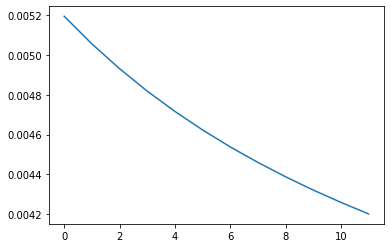

In [ ]:
for epoch in range(numEpochs): # количество эпох
    lossTot = 0 # потери в совокупности

    for i, (images, labels) in enumerate(trainLoader): # проходимся по всем данным в batch
        images = images.view(-1, 28*28).to(device)     # приводим к правильному формату для сетки
        labels = labels.to(device)                    # отправляем метки на используемое устройство
        optimizer.zero_grad()                          # обнуляем градиент
        outputs = model(images)                        # здесь наше предсказание
        loss = criterion(outputs.log(), labels)        # считаем ошибку 
        loss.backward()                                # обратное распространение ошибки 
                                                       # x.grad += dloss/dx для всех параметров x

        lossTot += loss.cpu().detach().data # инкремент ошибки
        
        optimizer.step() # следующий шаг спуска

    losses.append(lossTot/len(trainDataset)) # вычисляем среднюю ошибку и добавляем в список
    print('Эпоха: [%d/%d], Ошибка: %.4f' 
           % (epoch+1, numEpochs, loss))
plt.plot(losses) # График нашего обучения

(<matplotlib.image.AxesImage at 0x7f70411e6f90>, tensor(4))

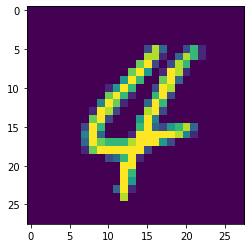

In [ ]:
plt.imshow(trainX[9, 0]), trainY[9]

In [ ]:
x = model(trainX[9].view(-1, 784).to(device)).detach()
print(x.data)
print(torch.max(x.data,dim=1)) # ответ в виде вероятностей


tensor([[0.0052, 0.0053, 0.0231, 0.0016, 0.6337, 0.0132, 0.0727, 0.0440, 0.0438,
         0.1575]], device='cuda:0')
torch.return_types.max(
values=tensor([0.6337], device='cuda:0'),
indices=tensor([4], device='cuda:0'))


# Проверка работы модели





In [ ]:
correct = 0
total = 0

model.eval() # режим проверки

with torch.no_grad():                               # отключаем автоматическое дифференцирование
    for images, labels in testLoader:               # итерируем по проверочному датасету
        images = images.view(-1, 28*28).to(device)  # приводим к нужному формату
        labels = labels.to(device)                  # отправляем метки на используемое устройство
        outputs = model(images)                     # делаем прогноз
        _, predicted = torch.max(outputs.data, 1)   # _ максимальное значение пропускаем, нас интересует, что это за цифра
        total += labels.size(0)                     # размер тензора с метками (0 - первое/единственное значение)
        correct += (predicted == labels).sum()      # подсчет количества верных ответов в батче
    
print('Точность для 10000 картинок: %d %%' % (100 * correct / total))

Точность для 10000 картинок: 89 %


In [ ]:
print(outputs[0], torch.max(outputs.data, 1))
print(labels)

tensor([0.0024, 0.0480, 0.0323, 0.0338, 0.0029, 0.0481, 0.0070, 0.0015, 0.8197,
        0.0043], device='cuda:0') torch.return_types.max(
values=tensor([0.8197, 0.6131, 0.7757, 0.7257, 0.2647, 0.5418, 0.6757, 0.4030, 0.9845,
        0.9420, 0.6421, 0.8992, 0.5250, 0.7322, 0.5654, 0.9435, 0.7075, 0.9685,
        0.6977, 0.7614, 0.9504, 0.8519, 0.5154, 0.9370, 0.4906, 0.2469, 0.4361,
        0.8529, 0.7142, 0.9064, 0.9675, 0.9602, 0.7327, 0.8793, 0.7725, 0.9282,
        0.7522, 0.5240, 0.9723, 0.9486, 0.5436, 0.5036, 0.9099, 0.3429, 0.4902,
        0.6045, 0.9491, 0.7740, 0.7497, 0.9406, 0.9287, 0.8241, 0.9261, 0.5910,
        0.4446, 0.4562, 0.8589, 0.7929, 0.7645, 0.2768, 0.8254, 0.9751, 0.7420,
        0.9403, 0.8855, 0.8467, 0.9268, 0.6952, 0.9744, 0.9464, 0.6846, 0.9078,
        0.9220, 0.6282, 0.9581, 0.5606, 0.8692, 0.9027, 0.8930, 0.9047, 0.5457,
        0.7155, 0.6083, 0.9885, 0.9390, 0.4081, 0.5062, 0.9373, 0.9181, 0.9959,
        0.9720, 0.7474, 0.5024, 0.8428, 0.9778, 0.9951,

# Сверточная сеть




In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # nn.Sequential позволяет создать последовательность слоев и записать это в одну переменную
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding = 2),   # сверточный слой
            nn.BatchNorm2d(16),                             # слой батч-нормализации
            nn.ReLU(),                                      # функция активации relu
            nn.MaxPool2d(2))                                # слой пуллинга
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding = 2),  # сверточный слой
            nn.BatchNorm2d(32),                             # слой батч-нормализации
            nn.ReLU(),                                      # функция активации relu
            nn.MaxPool2d(2))                                # слой пуллинга
        self.fc = nn.Linear(7*7*32, numClasses)             # выходной слой
        
    def forward(self, x):
        out = self.layer1(x)                                # выход первого сверточного слоя
        out = self.layer2(out)                              # выход второго сверточного слоя
        out = out.view(out.size(0), -1)                     # вытягиваем карты признаков в векторы для подачи в полносвязный слой
        out = self.fc(out)                                  # выход полносвязного слоя
        return out                                          # возвращаем результат работы сети

model = CNN().to(device) # создаем модель

In [ ]:
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             416
       BatchNorm2d-2           [-1, 16, 28, 28]              32
              ReLU-3           [-1, 16, 28, 28]               0
         MaxPool2d-4           [-1, 16, 14, 14]               0
            Conv2d-5           [-1, 32, 14, 14]          12,832
       BatchNorm2d-6           [-1, 32, 14, 14]              64
              ReLU-7           [-1, 32, 14, 14]               0
         MaxPool2d-8             [-1, 32, 7, 7]               0
            Linear-9                   [-1, 10]          15,690
Total params: 29,034
Trainable params: 29,034
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.47
Params size (MB): 0.11
Estimated Total Size (MB): 0.58
---------------------------------------------

In [ ]:
# Ошибка и оптимизатор
criterion = nn.CrossEntropyLoss() # функция ошибки
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate) # оптимизатор
model.train() # переход в режим обучения

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [ ]:
# Обучение модели
curTime = time.time()
for epoch in range(numEpochs):
    for i, (images, labels) in enumerate(trainLoader):        
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad() # обнуляем градиент
        outputs = model(images) # делаем предсказание
        loss = criterion(outputs, labels) # считаем ошибку 
        loss.backward() # обратное распространение ошибки
        optimizer.step() # шаг оптимизации
        
        if (i+1) % 100 == 0:
            print('Эпоха: [%d/%d], Шаг: [%d/%d], Ошибка: %.4f' 
                  % (epoch+1, numEpochs, i+1, len(trainDataset)//batchSize, loss))
print('Время обработки: ', round(time.time() - curTime))

Эпоха: [1/10], Шаг: [100/600], Ошибка: 0.1303
Эпоха: [1/10], Шаг: [200/600], Ошибка: 0.1438
Эпоха: [1/10], Шаг: [300/600], Ошибка: 0.0190
Эпоха: [1/10], Шаг: [400/600], Ошибка: 0.0655
Эпоха: [1/10], Шаг: [500/600], Ошибка: 0.1333
Эпоха: [1/10], Шаг: [600/600], Ошибка: 0.1355
Эпоха: [2/10], Шаг: [100/600], Ошибка: 0.1020
Эпоха: [2/10], Шаг: [200/600], Ошибка: 0.0331
Эпоха: [2/10], Шаг: [300/600], Ошибка: 0.0444
Эпоха: [2/10], Шаг: [400/600], Ошибка: 0.0440
Эпоха: [2/10], Шаг: [500/600], Ошибка: 0.1069
Эпоха: [2/10], Шаг: [600/600], Ошибка: 0.0270
Эпоха: [3/10], Шаг: [100/600], Ошибка: 0.0213
Эпоха: [3/10], Шаг: [200/600], Ошибка: 0.0624
Эпоха: [3/10], Шаг: [300/600], Ошибка: 0.0030
Эпоха: [3/10], Шаг: [400/600], Ошибка: 0.0153
Эпоха: [3/10], Шаг: [500/600], Ошибка: 0.0050
Эпоха: [3/10], Шаг: [600/600], Ошибка: 0.0482
Эпоха: [4/10], Шаг: [100/600], Ошибка: 0.0078
Эпоха: [4/10], Шаг: [200/600], Ошибка: 0.0107
Эпоха: [4/10], Шаг: [300/600], Ошибка: 0.0055
Эпоха: [4/10], Шаг: [400/600], Оши

In [ ]:
# Проверка результатов
model.eval()  # включаем режим проверки
correct = 0
total = 0

with torch.no_grad():                              # отключаем автоматическое дифференцирование
    for images, labels in testLoader:              # итерируем по проверочному датасету
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)                    # делаем прогноз
        _, predicted = torch.max(outputs.data, 1)  # _ максимальное значение пропускаем, нас интересует, что это за цифра
        total += labels.size(0)                    # размер тензора с метками (0 - первое/единственное значение)
        correct += (predicted == labels).sum()     # подсчет количества верных ответов в батче
    
print('Точность для 10000 картинок: %d %%' % (100 * correct / total))

Точность для 10000 картинок: 99 %


# **Глоссарий**
*   **train dataset** - объект, включающий в себя ваш набор данных. На выходе такого объекта всегда должен быть тензор.
*   **train loader** - объект, в который вы подгружаете ваш train dataset, и который используете при обучении нейронной сети для итерирования по всему набору данных. 
*   **optimizer.zero_grad()** - обнуляет результат дифференциирования.
*   **loss.backward()** - считает градиент для обратного распространения ошибки. 
*   **optimizer.step()** - принимает (автоматически) посчитанные градиенты и делает шаг оптимизации.
*   **nn.Module** - базовый класс нейронной сети, на котором строится собственная нейронная сеть.
*   **def forward(self,x)** - функция-движитель. Связывает инициализированные слои. На вход принимается х (batch) и передается дальше по всем слоям.
*   **data.Dataset** -  базовый класс дата сета, на котором строится собственный датасет.
*   **.view()** - функция, интерпретирующая размер объекта для данной итерации в том виде, который указан в качестве параметра.
*   **.data** - получить исключительно статичные данные из тензора.
*   **.detach()** - открепить тензор от вычислительного графа.
*   **model.train()** - перевести объект нейронки в обучающи режим.
*   **model.eval()** - перевести объект нейронки в режим оценки.

# **Обратите внимание**

*   В параметрах тензора вы можете вручную прописать поддержку дифференциирования
*   Для удобства всегда создавайте DataLoader. Для DataLoader необходим Dataset
*   Dataset всегда можно прописать "вручную"
*   Прописываете архитектуру модели через отдельный класс
*   Выбирая функцию ошибки, смотрите, какой формат должен подаваться на вход
*   Во время обучения не забывайте о последовательности .zero_grad -> .backward -> .step
*   Режимы тренировочный и оценочный являются *разными* для Pytorch. Не забывайте указывать это в начале.    


